# MATH 467 - Homework 5

Jack Dean

In [1]:
import pandas as pd
import numpy as np
import datetime

from scipy.stats import norm

import StoCalCodeDeck as stocal

import matplotlib.pyplot as plt

## Problem 1

We consider an $N$-period binomial market, with the notation used in the lectures. We consider a special option of American type: it gives you the right to sell a share of stock for the strike price $K$ at any time until expiration (similarly as an American put). However, if you did not exercise earlier than $T$, you must exercise at time $T$ (and potentially get a negative payoff). In short, if you exercise when the stock price is $S_t$, your payoff is $K−S_t$ (even if it’s negative). We call $X_0$ the price of this option at time $0$.  
(a) For the option above, prove using backward induction that it’s always better to exercise than to wait for another period. Thus, the optimal strategy is to exercise immediately and the price of this option is $X_0=K−S_0$.  
*Hint*: use a similar idea as in the proof that optimal exercise for the American call is at maturity and the fact that, at any node $k$,  
$$q_ks_{2k+1}+(1−q_k)s_{2k}=(1+r\Delta t)s_k$$
(b) Let C_0 (resp. P_0) denote the price of an American call (resp. put) with strike price $K$. We consider two investment opportunities:  
1. an American put with strike price $K$  
2. an American call with strike price $K$ and the option studied above.  
Explain why the second opportunity is at least as valuable as the first one. Conclude that
$$P_0\leq K−S_0+C_0$$
(c) Using (European) put-call parity established in HW#2, conclude that
$$P_0\geq\frac{K}{(1+r\Delta t)^N}-S_0+C_0$$
(d) The results of (b) and (c) provide bounds for the American put price, which use quantities which are easier to calculate (remember that the price of the American and European call are the same). Calculate those bounds for the market model in Problem 1 of HW#3 and comment on their quality.  
(e) What happens if the interest rate is $0\%$? Find the price of the options in the market model of Problem 1 of HW#3 if $r=0\%$. What can you conclude about the price of an American put when $r=0\%$?

### Solution to Part (a)

Consider an arbitrary node $j$ in the combining binomial tree where the risk-neutral probability of an up move to node $S_{2j+1}$ is denoted $q_j$ (and the risk-neutral probability of a down move to $S_{2j}$ is $1-q_j$).  We have
$$S_j(1+r\Delta t) = q_jS_{2j+1} + (1-q_j)S_{2j}$$
The option option can surely pay off $f = K-S_j$ at the node due to its american nature.  Waiting another period, we can derive the value of the option as a function of the risk-neutral probability $q_j$, denoted $\tilde{f}$.  We have
$$\tilde{f} = \frac{1}{1+r \Delta t} (q_j f(S_{2j+1}) + (1-q_j) f(S_{2j}))$$
$$\tilde{f} = \frac{1}{1+r \Delta t} (q_j (K-S_{2j+1}) + (1-q_j)(K-S_{2j}))$$
$$\tilde{f} = \frac{1}{1+r \Delta t} (q_jK-q_jS_{2j+1} + (1-q_j)K-(1-q_j)S_{2j})$$
$$\tilde{f} = \frac{1}{1+r \Delta t} (K-q_jS_{2j+1}-(1-q_j)S_{2j})$$
$$\tilde{f} = \frac{1}{1+r \Delta t} (K-S_{j}(1 + r \Delta t))$$
$$\tilde{f} = \frac{1}{1+r \Delta t}K-S_{j}$$
Obviously, we can see
$$f_j = K-S_j \geq \frac{1}{1+r \Delta t}K-S_{j} = \tilde{f}$$
This implies that at time $t=0$, $f_0=f(S_0)=K-S_0=X_0$, the price of the option.

### Solution to Part (b)

We are asked to show
$$P_0 \leq C_0 + X_0$$
Subsituting by definition and manipulating the equation we see
$$P_0 \leq C_0 + K - S_0 \implies P_0 - C_0 \leq K - S_0$$
Which shows the lower bound of the American Put-Call parity.  This validates the result.

### Solution to Part (c)

The European Put-Call Parity is
$$c_0-p_0=S_0-\mathrm{PV}(K)$$
We know in the American Option case $C_0=c_0$ and $P_0\geq p_0$, therefore
$$c_0-p_0=S_0-\mathrm{PV}(K)\geq C_0-P_0$$
Manipulating this equation we see
$$\mathrm{PV}(K)-S_0+C_0\leq P_0$$
Which confirms the lower bound of the Put.

### Solution to Part (d)

We have shown
$$\mathrm{PV}(K)-S_0+C_0\leq P_0 \leq K-S_0+C_0$$
From Problem 1 of Homework 3, we know $K=4$, $T=2$, $S_0=4$, and $r=25\%$.  We calculated the American Call to be $C_0=\frac{48}{25}$.  Therefore, we can bound the value of the American Put as follows.
$$(\frac{1}{1+25\%})^2(4)-4+\frac{48}{25} \leq P_0 \leq \frac{48}{25} + 4 - 4$$
We can evaluate the bounds to be
$$\frac{12}{25}\leq P_0 \leq \frac{48}{25}$$
And we calculated $P_0=\frac{4}{5}$, which falls between these bounds.

### Solution to Part (e)

In the $0\%$ interest rate case, it is clear that an At-The-Money American Put Option will be equal to the price of the American Call.
$$\frac{1}{1+0\%}K - S_0 + C_0 \leq P_0 \leq K - S_0 + C_0 \implies P_0 = K-S_0+C_0$$

## Problem 2 -- Fundamental Option Pricing Formula

This problem is based on the fundamental option pricing formula for the CRR model developed in class, namely the value at time $0$ of an option with maturity $T$ and payoff $F$ is given by:  
$$F_0 = e^{−rT}\mathbb{E}_{\mathcal{Q}}[F]$$
We consider the two options below:  
A. An option with which you must buy a share of stock at expiration $T=1$ for strike price $K=S_0$.  
B. An option with which you must buy a share of stock at expiration $T=1$ for strike price $K$ given by
$$K = \frac{1}{N}\sum_{j=0}^NS_{t_j}$$
*Note*: that both options can have negative payoffs  

We use a CRR model with $N$ periods to price these options. Assume that the interest rate on the money market is $r$.  
(a) Using the fundamental option pricing formula, find the price of option A.
*Hint*: use the martingale properties developed in the lectures for the stock price process  
(b) Using the fundamental option pricing formula, find the price of option B.  
(c) Find the limit as $N\longrightarrow\infty$ of the results in (a) and (b).  
(d) Assuming the interest rate is very small ($r\approx0$), use Taylor expansions to find the first order approximation in $r$ of the two results in (c).  
(e) Can we intuitively explain the result?

### Solution to Part (a)

We begin with
$$F_0^A = (1+\frac{r}{N})^{-N}\mathbb{E}_{\mathcal{Q}}[F] = (1+\frac{r}{N})^{-N}\mathbb{E}_{\mathcal{Q}}[S_T-S_0]$$
$$F_0^A = (1+\frac{r}{N})^{-N}(\mathbb{E}_{\mathcal{Q}}[S_T] - \mathbb{E}_{\mathcal{Q}}[S_0]) = \mathbb{E}_{\mathcal{Q}}[(1+\frac{r}{N})^{-N}S_T] - (1+\frac{r}{N})^{-N}S_0$$
$$F_0^A = \mathbb{E}_{\mathcal{Q}}[D_T] - (1+\frac{r}{N})^{-N}S_0 = D_0 - (1+\frac{r}{N})^{-N}S_0$$
$$\implies F_0^A = S_0 (1 - (1+\frac{r}{N})^{-N})$$

### Solution to Part (b)

$$F_0^B = (1+\frac{r}{N})^{-N}\mathbb{E}_{\mathcal{Q}}[F] = (1+\frac{r}{N})^{-N}\mathbb{E}_{\mathcal{Q}}[S_T - \frac{1}{N}\sum_{j=0}^N S_{t_j}]$$
$$F_0^B = (1+\frac{r}{N})^{-N}(\mathbb{E}_{\mathcal{Q}}[S_T] - \frac{1}{N}\sum_{j=0}^N\mathbb{E}_{\mathcal{Q}}[S_{t_j}])$$
$$F_0^B = \mathbb{E}_{\mathcal{Q}}[D_T] - (1+\frac{r}{N})^{-N}\frac{1}{N}\sum_{j=0}^N\mathbb{E}_{\mathcal{Q}}[S_{t_j}])$$
This was as far as I got

### Solution to Part (c)

**Option A**

$$\lim_{N\longrightarrow\infty} S_0(1-(1+\frac{r}{N})^{-N}) = S_0(1-e^{-r})$$

**Option B**

### Solution to Part (d)

**Option A**  
The first-order Taylor expansion is
$$S_0(1-e^{-r}) \approx S_0((1-e^{-a}) + (e^{-a}(r-a)))$$
Evaluating this at $a=0$, we see
$$S_0(1-e^{-r}) \approx S_0(r)$$

**Option B**  
The first-order Taylor expansion is

### Solution to Part (e)

Option A's result implies the value of the option is the rate times the intial spot price of the asset.

## Problem 3 -- Black-Scholes Comparison

We put ourselves in the setting of Prob. 3 of HW#3. There, we worked out (using a computer) the price of a European call and a European put options for large $N$. Use the Black-Scholes formula to find the price of the European call and put-call parity (or the Black-Scholes formula for a put) to find the price of the European put of Prob. 3 of HW#3. Compare the results with the prices obtained in HW#3 and comment on the quality of the approximation.

*Recall*: Black-Scholes Formula
$$C_t = N(d_+)S_t - N(d_-)Ke^{r(T-t))}$$
$$d_{\pm} = \frac{\mathrm{ln}(\frac{S_t}{K}) + (r \pm \frac{\sigma^2}{2})(T-t))}{\sigma \sqrt{T}}$$

### Solution

To solve this problem, I write two functions.  I then use these functions to price the call and put.

In [2]:
'''
Parameters - These are given in HW3 problem 3, although I call them again for clarity
'''
mu, sigma = stocal.walk_params(u=0.005,d=0.003,T=1,N=60)

s0 = 1000
k = 1025
r = 0.05
t = 1

In [3]:
def price_bsm(s0, k, r, t, sigma):
    '''
    Prices a European Call Option using the Black-Scholes Formula
    ---
    s0 - Current stock price
    k - strike price
    r - risk-free interest rate (per annum)
    t - time to maturity, in years
    sigma - asset volatitly
    '''
    import numpy as np
    from scipy.stats import norm
    d_plus = (np.log(s0/k) + (r + ((sigma ** 2) / 2)) * t) / (sigma * np.sqrt(t))
    d_less = (np.log(s0/k) + (r - ((sigma ** 2) / 2)) * t) / (sigma * np.sqrt(t))
    price = norm.cdf(d_plus) * s0 - norm.cdf(d_less) * k * np.exp(-r * t)
    
    return price

In [4]:
'''Price the Call Option using BSM'''
call_price = price_bsm(s0,k,r,t,sigma)
print('The price of the Call per BSM is ${:.2f}'.format(call_price))

The price of the Call per BSM is $28.55


In [5]:
def put_call_parity(option_price, option_type, s0, k, r, t):
    '''
    Uses the price of a european option to return its opposite's price
    ---
    option_price - price of given option
    option_type - type of given option ('p' for put and 'c' for call)
    s0 - current asset price
    k - strike price
    r - risk-free interest rate (per annum)
    t - time to maturity, in years
    '''
    import numpy as np
    if option_type == 'c':
        price = - s0 + np.exp(-r * t)*k + option_price
    elif option_type == 'p':
        price = s0 - np.exp(-r * t)*k + option_price 
    
    return price

In [6]:
'''Price the Put Option using Put-Call Parity'''
put_price = put_call_parity(option_price=call_price,option_type='c',s0=1000,k=1025,r=0.05,t=1)
print('The price of the Put per Put-Call Parity is ${:.2f}'.format(put_price))

The price of the Put per Put-Call Parity is $3.56


*COMMENTS*

## Problem 4 -- Estimating Parameters and Option Pricing

The purpose of this problem is to price options based on real data with the Black-Scholes model.  
Consider your selected stock for the semester (used in Prob. 2 of HW#4) and the same options considered in that problem. Remember that the parameters $\mu$ and $\sigma$ were already estimated in part (a) of that problem. (You are welcome to consider the dates and parameters obtained then, or reestimate the data with more up-to-date data, it’s up to you.)  
(a) Price the call options using the Black-Scholes formula, using the parameters estimated from your data.  
(b) Compare your results to the market price and comment on the accuracy of your results and what could explain the differences.  
(c) Repeat question (a) and (b) for the put options, either using the Black-Scholes formula for a put or the put-call parity formula. Comment on the accuracy of your results and explain any discrepancies between your estimate and the market price.

### Solution to Part (a & b)

In [7]:
'''
Get ETF Data
This is same code used to get code in HW4
'''
etf, etf_data = stocal.asset_data(ticker = 'LQD', start_date='2017-01-01', end_date=datetime.datetime.today())
expiry, years_to_expiry = stocal.maturity(0.25, etf)
px_last = etf_data.iloc[-1,3]

'''Get Option Data'''
options = etf.option_chain(expiry)
calls = options.calls
puts = options.puts

'''
In HW4 problem 2, strikes for calls were
ITM = 120
ATM = 122
OTM = 126
'''

itm_k = 120
atm_k = 122
otm_k = 126

strikes = [itm_k,atm_k,otm_k]

calls = calls[calls['strike'].isin(strikes)]
puts = puts[puts['strike'].isin(strikes)]

'''Get Rates Data'''
rf = stocal.rates_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
'''Parameter Estimation & Option Pricing Calculation'''
lqd_mu, lqd_sigma = stocal.estimate_params(M = 500, data = etf_data)
call_prices = []
put_prices = []
for k in strikes:
    call_price = price_bsm(s0=px_last,k=k,r=rf,t=years_to_expiry,sigma=lqd_sigma)
    call_prices.append(call_price)
    put_price = put_call_parity(option_price=call_price,option_type='c',s0=px_last,k=k,r=rf,t=years_to_expiry)
    put_prices.append(put_price)

'''Data Storage'''
call_calcs = pd.DataFrame(data=[call_prices,calls['bid'],calls['ask']],
                        columns=strikes,
                        index=['theo','bid','ask']).transpose()

put_calcs = pd.DataFrame(data=[put_prices,puts['bid'],puts['ask']], 
                        columns=strikes, 
                        index=['theo','bid','ask']).transpose()

In [9]:
print(call_calcs)

         theo   bid   ask
120  2.299977  2.04  2.47
122  1.354983  1.24  1.45
126  0.349555  0.39  0.49


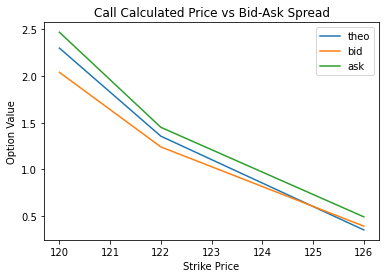

In [10]:
'''Call Calculation Plot'''
plt.plot(call_calcs)
plt.title('Call Calculated Price vs Bid-Ask Spread')
plt.xlabel('Strike Price')
plt.ylabel('Option Value')
plt.legend(call_calcs.columns)

### Solution to Part (c)

In [11]:
print(put_calcs)

         theo   bid   ask
120  1.510905  3.25  3.30
122  2.554760  4.10  4.55
126  5.527030  7.20  7.65


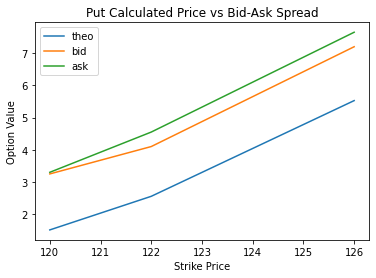

In [12]:
'''Put Calculation Plot'''
plt.plot(put_calcs)
plt.title('Put Calculated Price vs Bid-Ask Spread')
plt.xlabel('Strike Price')
plt.ylabel('Option Value')
plt.legend(put_calcs.columns)